# US GUN VIOLENCE

## Yash Chauhan

### General EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("US-Gun-Violence.csv")
df.head(50)

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2128682,September 29 2021,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0
1,2127374,September 28 2021,Illinois,Chicago,65th St and Calumet Ave,1,3.0
2,2128023,September 28 2021,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0
3,2126747,September 27 2021,New York,New York (Manhattan),3964 10th Ave,0,5.0
4,2126450,September 27 2021,Illinois,Chicago,826 N Ridgeway Ave,1,3.0
5,2125790,September 26 2021,Illinois,Chicago,800 block of S Albany Ave,0,6.0
6,2125953,September 26 2021,California,Oakland,1400 block of 8th Ave,0,4.0
7,2126261,September 26 2021,Washington,Seattle (Des Moines),22855 Pacific Hwy S,3,3.0
8,2125613,September 25 2021,New York,Utica,800 block of Mohawk St,0,4.0
9,2125444,September 25 2021,Tennessee,Athens,Co Rd 60,4,1.0


## NA Values Check

In [3]:
df=df.drop(["address"], axis=1)

In [4]:
df.isna().any()

incident_id       False
incident_date     False
state             False
city_or_county    False
killed            False
injured            True
dtype: bool

In [5]:
df[df.isna().any(axis=1)]
df["injured"].fillna(df["injured"].mean())

0       5.0
1       3.0
2       3.0
3       5.0
4       3.0
       ... 
3225    5.0
3226    4.0
3227    3.0
3228    3.0
3229    2.0
Name: injured, Length: 3230, dtype: float64

In [6]:
df.dtypes

incident_id         int64
incident_date      object
state              object
city_or_county     object
killed              int64
injured           float64
dtype: object

## Working with dates

In [7]:
df["incident_date"]=pd.to_datetime(df["incident_date"], format="%B %d %Y")
df.head()

,incident_id,incident_date,state,city_or_county,killed,injured
0,2128682,2021-09-29,Illinois,Chicago,0,5.0
1,2127374,2021-09-28,Illinois,Chicago,1,3.0
2,2128023,2021-09-28,Minnesota,Minneapolis,1,3.0
3,2126747,2021-09-27,New York,New York (Manhattan),0,5.0
4,2126450,2021-09-27,Illinois,Chicago,1,3.0


In [8]:
df[df["state"]=="New York"]

,incident_id,incident_date,state,city_or_county,killed,injured
3,2126747,2021-09-27,New York,New York (Manhattan),0,5.0
8,2125613,2021-09-25,New York,Utica,0,4.0
25,2119583,2021-09-19,New York,Rochester,2,2.0
26,2119470,2021-09-18,New York,Bronx,1,3.0
41,2114583,2021-09-11,New York,Utica,0,4.0
...,...,...,...,...,...,...
3104,155755,2014-07-06,New York,Buffalo,0,4.0
3117,153578,2014-06-28,New York,Manhattan,0,4.0
3162,129730,2014-04-27,New York,Troy,0,5.0
3188,115012,2014-03-14,New York,Brooklyn,0,4.0


In [9]:
df["month"]=df["incident_date"].dt.month
df.head()

,incident_id,incident_date,state,city_or_county,killed,injured,month
0,2128682,2021-09-29,Illinois,Chicago,0,5.0,9
1,2127374,2021-09-28,Illinois,Chicago,1,3.0,9
2,2128023,2021-09-28,Minnesota,Minneapolis,1,3.0,9
3,2126747,2021-09-27,New York,New York (Manhattan),0,5.0,9
4,2126450,2021-09-27,Illinois,Chicago,1,3.0,9


<AxesSubplot:>

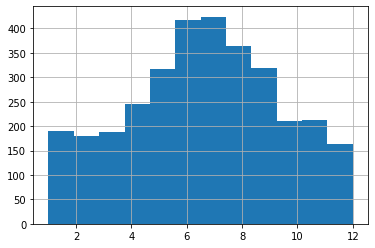

In [10]:
freq=df["month"].value_counts(sort=False)
df["month"].hist(bins=12)

<AxesSubplot:>

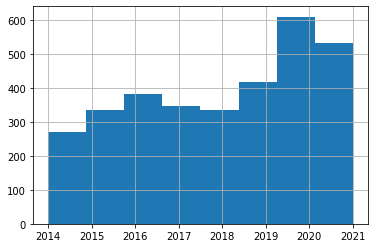

In [11]:
df["year"]=df["incident_date"].dt.year
df["year"].hist(bins=8)

([<matplotlib.axis.XTick at 0x1c42c087fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

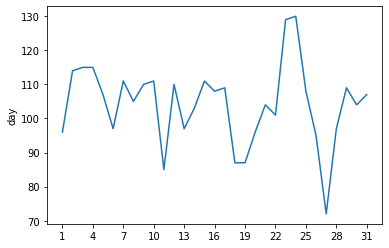

In [12]:
df["day"]=df["incident_date"].dt.day
sns.lineplot(x=range(1,32), y=df["day"].value_counts(sort=False))
plt.xticks(range(1,32,3))
#len(df["day"].value_counts(sort=False))

<AxesSubplot:ylabel='state'>

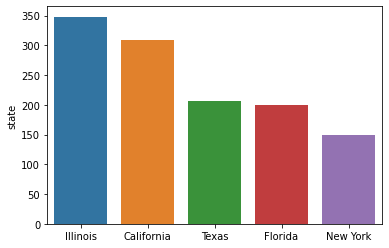

In [13]:
yy=df["state"].value_counts()
sns.barplot(x=yy.keys()[:5], y=yy.head(5))


In [14]:
illin=df.loc[df["state"]=="Illinois"]
illin

,incident_id,incident_date,state,city_or_county,killed,injured,month,year,day
0,2128682,2021-09-29,Illinois,Chicago,0,5.0,9,2021,29
1,2127374,2021-09-28,Illinois,Chicago,1,3.0,9,2021,28
4,2126450,2021-09-27,Illinois,Chicago,1,3.0,9,2021,27
5,2125790,2021-09-26,Illinois,Chicago,0,6.0,9,2021,26
24,2119609,2021-09-19,Illinois,Chicago,0,5.0,9,2021,19
...,...,...,...,...,...,...,...,...,...
3176,122136,2014-04-05,Illinois,Chicago,1,5.0,4,2014,5
3192,113214,2014-03-08,Illinois,Chicago,0,6.0,3,2014,8
3211,104218,2014-02-05,Illinois,Chicago,1,3.0,2,2014,5
3215,100434,2014-01-25,Illinois,Chicago,1,4.0,1,2014,25


In [15]:
yyy=illin["city_or_county"].value_counts()


<AxesSubplot:xlabel='killed', ylabel='state'>

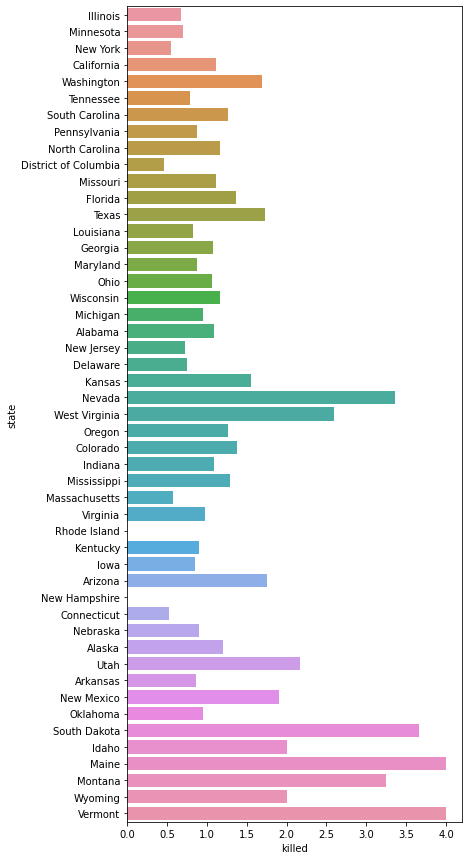

In [16]:
fig_dims = (6, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=df, y="state", x="killed", ax=ax, ci=None)

<AxesSubplot:xlabel='injured', ylabel='state'>

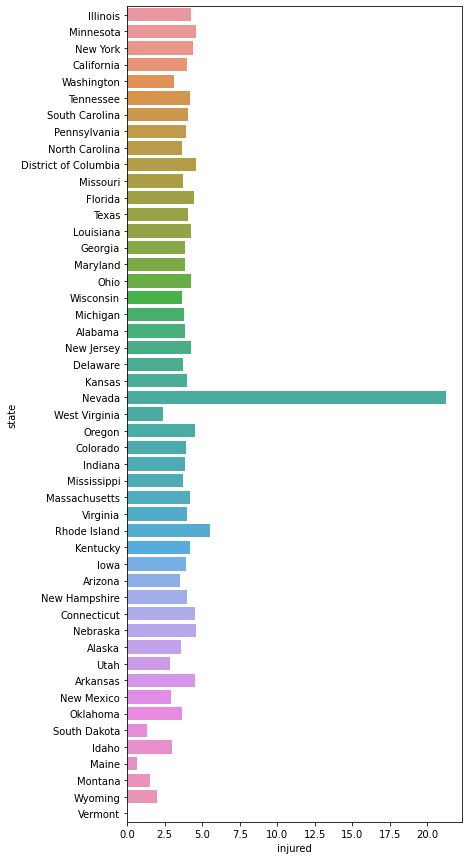

In [17]:
fig_dims = (6, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=df, y="state", x="injured", ax=ax, ci=None)

In [18]:
df.columns

Index(['incident_id', 'incident_date', 'state', 'city_or_county', 'killed',
       'injured', 'month', 'year', 'day'],
      dtype='object')

<AxesSubplot:xlabel='city_or_county'>

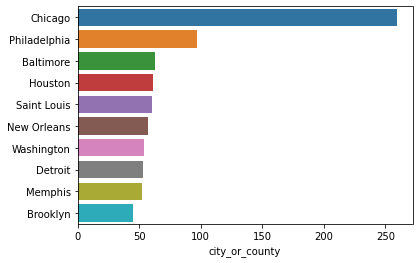

In [19]:
xx=df["city_or_county"].value_counts()
sns.barplot(y=xx.keys()[:10], x=xx.head(10))

In [20]:
df[df["state"]=="Nevada"]

,incident_id,incident_date,state,city_or_county,killed,injured,month,year,day
69,2102991,2021-08-29,Nevada,Las Vegas,1,3.0,8,2021,29
104,2089972,2021-08-13,Nevada,Las Vegas,1,6.0,8,2021,13
196,2053508,2021-07-04,Nevada,North Las Vegas,2,7.0,7,2021,4
505,1910619,2021-01-24,Nevada,Las Vegas,0,5.0,1,2021,24
566,1862603,2020-11-26,Nevada,Henderson,1,5.0,11,2020,26
599,1842362,2020-11-03,Nevada,Henderson,4,1.0,11,2020,3
610,1840544,2020-10-31,Nevada,North Las Vegas,0,4.0,10,2020,31
734,1780228,2020-08-29,Nevada,Las Vegas,2,2.0,8,2020,29
1349,1440879,2019-07-05,Nevada,Reno,1,5.0,7,2019,5
1496,1355275,2019-03-25,Nevada,North Las Vegas,0,5.0,3,2019,25


In [35]:
df2=df.copy()


<AxesSubplot:xlabel='killed', ylabel='city_or_county'>

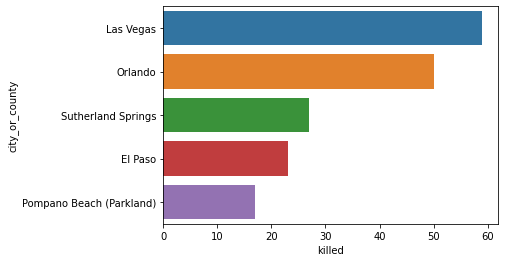

In [36]:
sns.barplot(y=df2.sort_values(by="killed", ascending=False).head(5)["city_or_county"] , x=df2.sort_values(by="killed", ascending=False).head(5)["killed"])
#df_killed

<AxesSubplot:xlabel='injured', ylabel='city_or_county'>

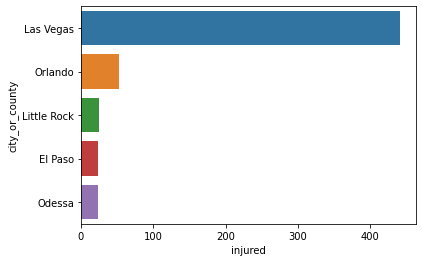

In [37]:
sns.barplot(y=df2.sort_values(by="injured", ascending=False).head(5)["city_or_county"] , x=df2.sort_values(by="injured", ascending=False).head(5)["injured"])

In [38]:
df.columns

Index(['incident_id', 'incident_date', 'state', 'city_or_county', 'killed',
       'injured', 'month', 'year', 'day'],
      dtype='object')

In [56]:
a=df["year"].value_counts(sort=False)
a.sort_index(inplace=True)
a

2014    270
2015    335
2016    382
2017    348
2018    336
2019    417
2020    610
2021    532
Name: year, dtype: int64

<AxesSubplot:ylabel='year'>

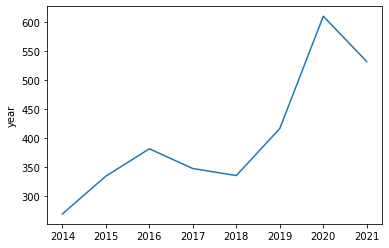

In [57]:
#df["year"].unique()
sns.lineplot(x=range(2014,2022), y=a)

<AxesSubplot:xlabel='injured', ylabel='killed'>

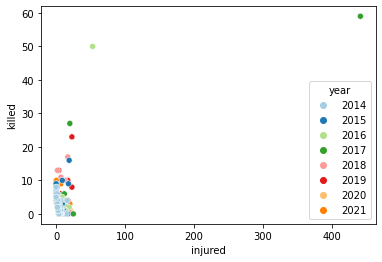

In [62]:
sns.scatterplot(data=df, x="injured", y="killed", hue="year", palette="Paired")